# Task 1 -Prediction using Unsupervised ML

#author:Kamlesh Sahane
#language:Python
#Task:From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
#load Iris dataset from datsets
iris = datasets.load_iris()

In [3]:
iris = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
#Check overview of datset
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Checked is there any null values in datset
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
#check shape of datset
iris.shape

(150, 4)

In [7]:
#check corelation between all features
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


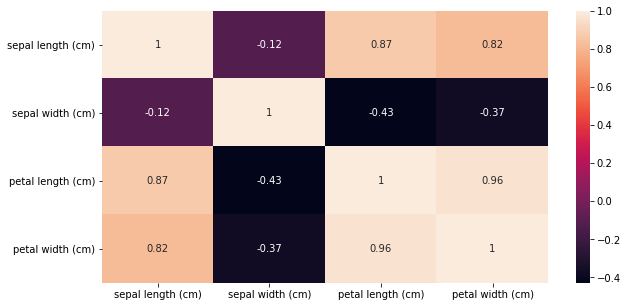

In [8]:
#Plot heat map of corelation for visual representation
plt.figure(figsize=(10,5))
sns.heatmap(iris.corr(),annot=True)
plt.show()


# From above heatmap we can clearly says that "Petal length" and "Petal width" both are highly corelated then we can definetly says that these two features will play important role identifying number of clusters

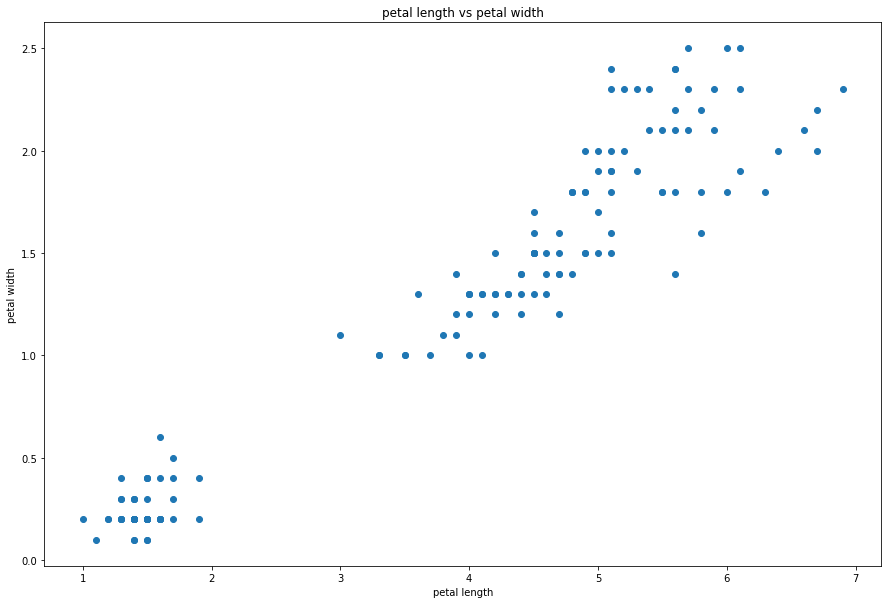

In [9]:
#Plot scatter plot between Petal length and petal width
plt.figure(figsize=(15,10))
plt.scatter(x="petal length (cm)",y="petal width (cm)",data=iris)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal length vs petal width")
plt.show()

In [10]:
#import KMeans from sklearn
from sklearn.cluster import KMeans

# For identifying clusters we should know "WCSS"=Within cluster sum of square we are going to take random clusters from 1 to 9 and going to plot graph between number of clusters and "WCSS"

In [11]:
wcss=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(iris[["petal length (cm)","petal width (cm)"]])
    wcss.append(model.inertia_)

In [12]:
#here we got value of wcss
wcss

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.98321314102564,
 11.03633387775173,
 9.265635950878515,
 7.816945054945058,
 6.456494541406307]

# plot graph between clusters and wcss it will form shape of elbow and at what cluster it will form elbow we are going to say that it is going to create that much of clutsers

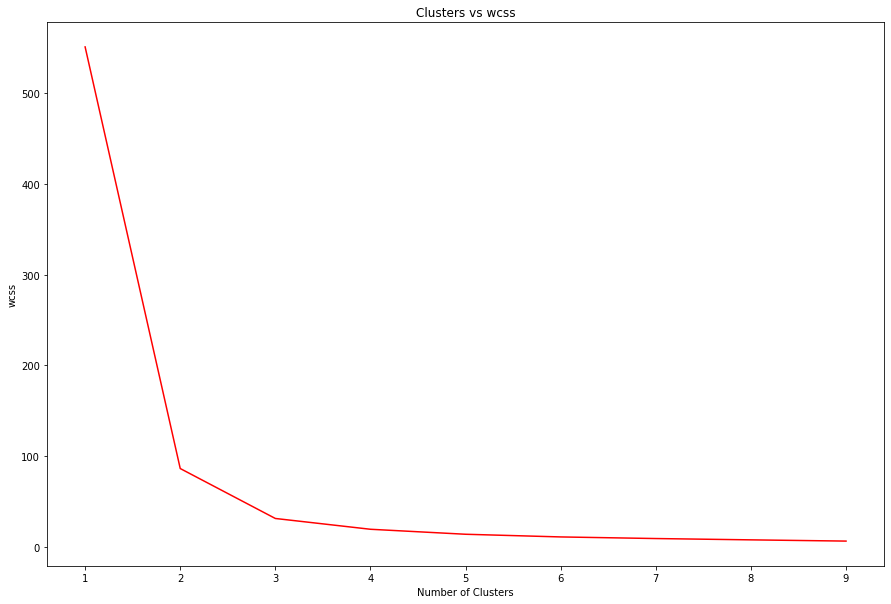

In [13]:
plt.figure(figsize=(15,10))
plt.plot(range(1,10),wcss,color="r")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.title("Clusters vs wcss")
plt.show()

# From above graph we can esily say that it is forming elbow at point 3 so it is going to create that much of clusters

In [14]:
#fit model and predict clusters
model=KMeans(n_clusters=3)
clusters=model.fit_predict(iris[["petal length (cm)","petal width (cm)"]])

In [15]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
#add this clusters into dataframe
iris["Species"]=clusters

In [17]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
#centers of clusters
model.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [19]:
#created diffrent datsets for diffrent clusters
df1=iris[iris.Species==0]
df2=iris[iris.Species==2]
df3=iris[iris.Species==1]

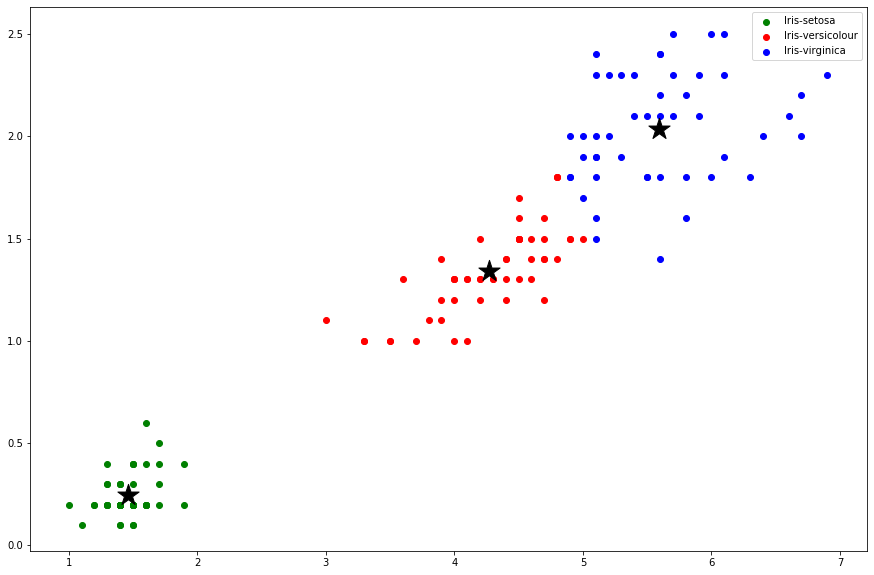

In [20]:
#plot graph between all  datsets with clusters and their centers and here we have labeled them according iris datsets
plt.figure(figsize=(15,10))
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="green",label="Iris-setosa")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="red",label='Iris-versicolour')
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color="blue",label='Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0],model.cluster_centers_[:,1],color="black",marker="*",s=500)
plt.legend()
plt.show()